Let us load the dataset and seperate the explanatory varibale from the response variable

In the given dataset,explanatory variable as follows

age	(int)
height	(int)
weight	(float )
gender	(categorical code)
ap_hi	(int)
ap_lo	(int)
cholesterol	(1: normal, 2: above normal, 3: well above normal)
gluc	(1: normal, 2: above normal, 3: well above normal)
smoke	(binary)
alco	(binary)
active	(binary)

Response variable is cardio	(binary)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

dataset = pd.read_csv("cardio_train.csv",sep=";")
column=["id","cardio"]
x=dataset.drop(column,axis=1)
y=dataset["cardio"]
y=y.astype(int)


verify whether any null values present the dataset

In [2]:
print(dataset.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [4]:
print(dataset.head(10))
dataset.describe()

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.0    130     90            3     3      0   
8  13  17668       1     158    71.0    110     70            1     1      0   
9  14  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Analysis the dataset, predict the variable that cause more impact on the prediction value.

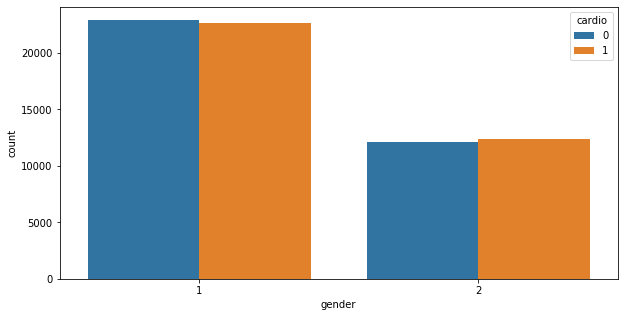

In [2]:
rcParams['figure.figsize'] = 10,5
sns.countplot(x='gender',hue='cardio',data=dataset)

In [3]:
dataset.cardio.value_counts()
diseased=(len(dataset[dataset.cardio==1])/len(dataset.cardio))*100
diseased_male=len(dataset[(dataset.cardio==1) & (dataset.gender==1)])/len(dataset.cardio)*100
diseased_female=len(dataset[(dataset.cardio==1) & (dataset.gender==2)])/len(dataset.cardio)*100

print("{:.2f}% of the total count were diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(diseased,diseased_male,diseased_female))

non_diseased=(len(dataset[dataset.cardio==0])/len(dataset.cardio))*100
non_diseased_male=len(dataset[(dataset.cardio==0) & (dataset.gender==1)])/len(dataset.cardio)*100
non_diseased_female=len(dataset[(dataset.cardio==0) & (dataset.gender==2)])/len(dataset.cardio)*100
print("\n{:.2f}% of the total count were  not diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(non_diseased,non_diseased_male,non_diseased_female))


49.97% of the total count were diseased, amoung which 32.31% were male and 17.66% were female

50.03% of the total count were  not diseased, amoung which 32.73% were male and 17.30% were female


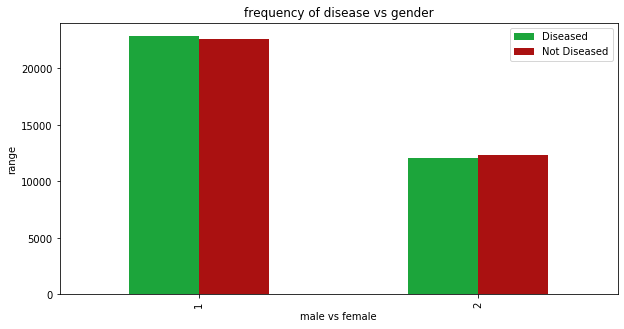

In [7]:
pd.crosstab(dataset.gender, dataset.cardio).plot(kind="bar",figsize=(10,5),color=['#1CA53B','#AA1111' ])
plt.title("frequency of disease vs gender")
plt.ylabel('range')
plt.xlabel('male vs female')
plt.legend(["Diseased","Not Diseased"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

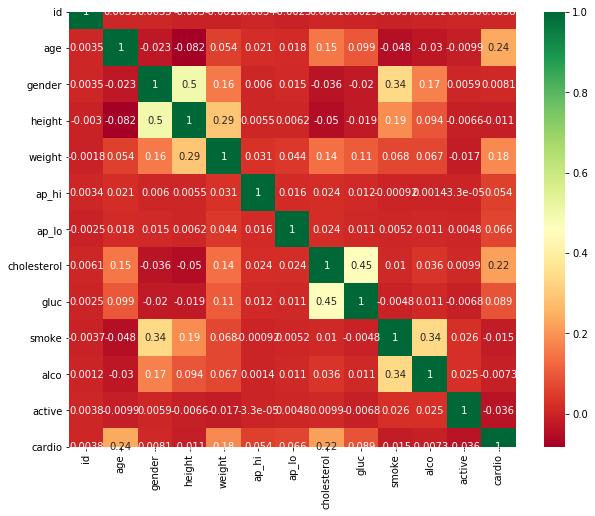

In [8]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn') 
#sns.heatmap(dataset.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

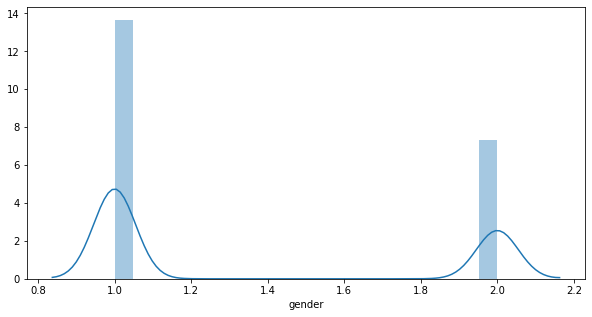

In [9]:
sns.distplot(dataset["gender"])

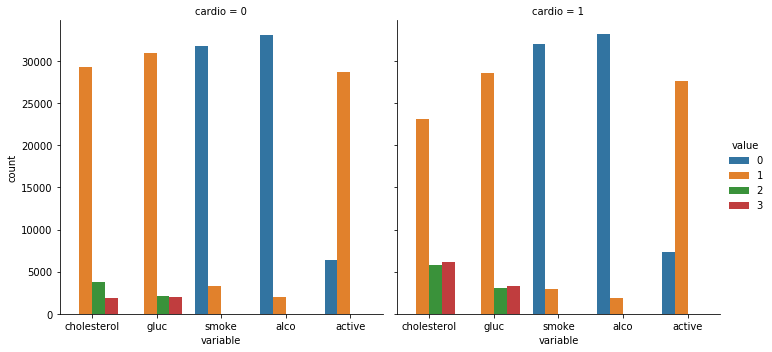

In [10]:
col=['cholesterol','gluc', 'smoke', 'alco', 'active']
data_value=pd.melt(dataset,id_vars="cardio",value_vars=dataset[col])
sns.catplot(x="variable",hue="value",col="cardio",data=data_value,kind="count")

Now let us build a suitable prediction model based on the given dataset

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=0)

Classification using Naivebayes

In [28]:
Classifiers = list()
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_x,train_y)
y_pred_NB = GNB.predict(test_x)
Classifiers.append(y_pred_NB)

Classification using KNeighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x,train_y)
y_pred_KN = knn.predict(test_x)
Classifiers.append(y_pred_KN)

classification using Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(train_x,train_y)
y_pred_Deci = DTR.predict(test_x)
Classifiers.append(y_pred_Deci)

Classification using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=500,random_state=0)
RFC.fit(train_x,train_y)
y_pred_RF = RFC.predict(test_x)
Classifiers.append(y_pred_RF)

In [ ]:
Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(test_x)
y_true=test_y
cm=confusion_matrix(y_true,y_pred)
print(cm)

In [14]:
import numpy as np
from sklearn import  svm
import pandas as pd

In [15]:
clf = svm.SVC()

clf.fit(train_x,train_y)
confidence = clf.score(test_x, test_y)
print(confidence)


C:\Users\kratika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5712857142857143


In [16]:
score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 

In [18]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(train_x,train_y)
score.append(svm.score(test_x,test_y)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(test_x,test_y)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(test_x)
y_true=test_y
cm=confusion_matrix(y_true,y_pred)
print(cm)

C:\Users\kratika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm test accuracy = 57.128571428571426
[[2105 4964]
 [1038 5893]]


In [5]:
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split

In [11]:
from keras.layers import Dense, Activation


nnmodel = Sequential()
nnmodel.add(Dense(32, input_shape=(50,50,3)))
nnmodel.add(Activation('relu'))
nnmodel.add(Flatten())
#nnmodel.add(Dense(8,activation="softmax")) 
nnmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50, 50, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [12]:
nnmodel.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['mae', 'acc'])

nnhistory =nnmodel.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, verbose=1)

ValueError: Error when checking input: expected dense_4_input to have 4 dimensions, but got array with shape (56000, 11)

Classification using XGBoost

In [16]:
import xgboost as XGB
XGBC = XGB.XGBClassifier()
XGBC.fit(train_x,train_y)
y_pred_XGB = XGBC.predict(test_x)
Classifiers.append(y_pred_XGB)

In [ ]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show() 

In [20]:
Class = ['Naive Bayes' , 'KNeighbors' ,'DecisionTree', 'RandomForest' , 'XGBoost']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(test_y,Classifiers[pred]):
        a = accuracy_score(test_y,Classifiers[pred])
        index=pred
        
    print("accuracy of {} classifier is {:.2f}%".format(Class[pred],accuracy_score(test_y,Classifiers[pred])*100))
    
print("\nbest classifier is {} and the accuracy is {:.2f}%".format(Class[index],a*100))

accuracy of Naive Bayes classifier is 58.85%
accuracy of KNeighbors classifier is 67.91%
accuracy of DecisionTree classifier is 63.47%
accuracy of RandomForest classifier is 71.46%
accuracy of XGBoost classifier is 73.60%

best classifier is XGBoost and the accuracy is 73.60%


In [21]:
from sklearn.metrics import roc_curve, auc

def plotROC(test_y,pred, name, color):
    # probs from log preds
    probs = np.exp(pred)
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(test_y, probs, pos_label=1)

    # Compute ROC area
    roc_auc = auc(fpr, tpr)
    print('ROC area is {0}'.format(roc_auc))
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+ name)
    plt.legend(loc="lower right")

[0 0 0 ... 1 0 0]
ROC area is 0.5854314640653145
[0 0 0 ... 1 0 1]
ROC area is 0.6788550516102188
[0 0 0 ... 1 0 1]
ROC area is 0.6346886480133305
[0 0 0 ... 1 0 1]
ROC area is 0.7144028626944753
[0 0 0 ... 1 0 1]
ROC area is 0.7355546729754701


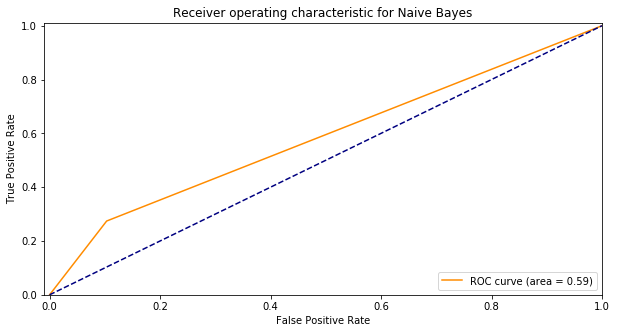

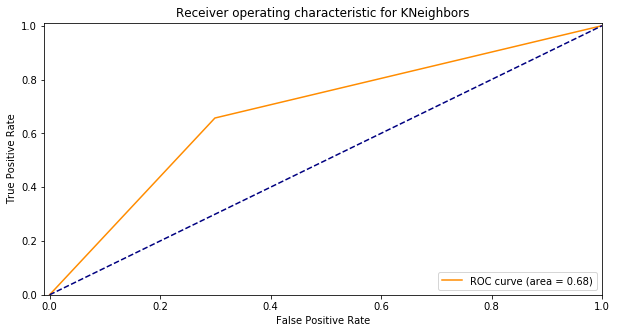

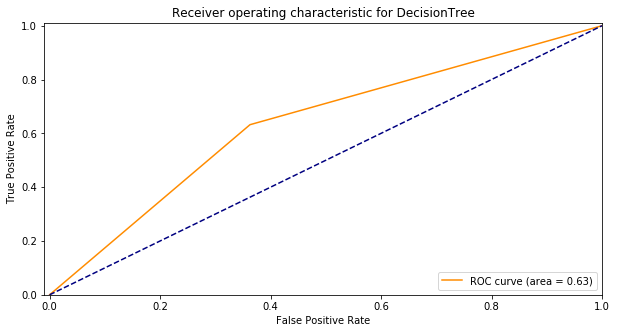

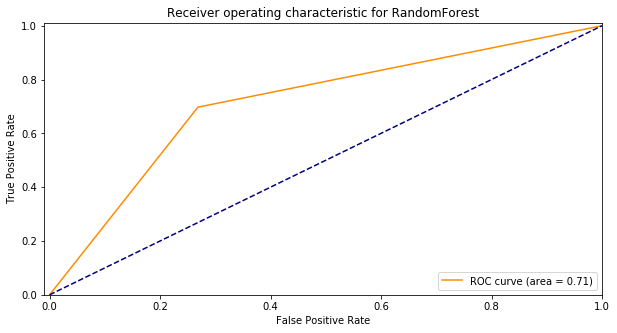

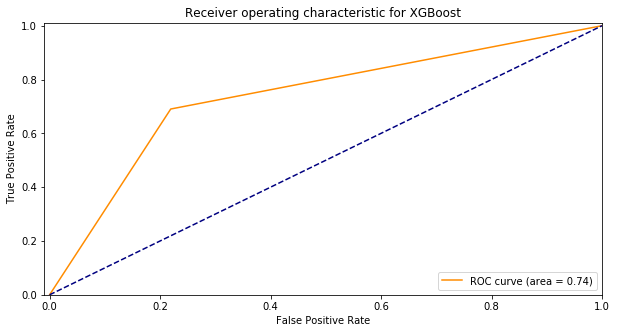

In [22]:
for pred in range(len(Classifiers)):
    plotROC(test_y,Classifiers[pred], Class[pred])
    

ROC area is 0.5854314640653145
ROC area is 0.6788550516102188
ROC area is 0.6346886480133305
ROC area is 0.7144028626944753
ROC area is 0.7355546729754701


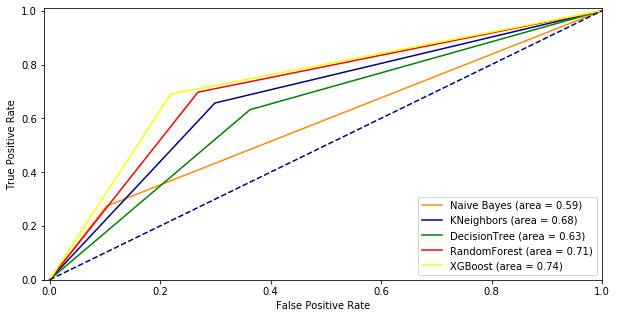

In [30]:
COLOR = ['darkorange' , 'navy' ,'green', 'red' , 'yellow']
# probs from log preds

# Compute ROC curve

plt.figure()
for pred in range(len(Classifiers)):
    probs = np.exp(Classifiers[pred])
    fpr, tpr, thresholds = roc_curve(test_y, probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print('ROC area is {0}'.format(roc_auc))
    plt.plot(fpr, tpr, color=COLOR[pred], label=Class[pred] +' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


    

In [1]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [2]:
# validate on val set
predictions = model.predict(X_val_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

NameError: name 'model' is not defined

In [27]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 

for pred in range(len(Classifiers)):
    results = confusion_matrix(test_y, Classifiers[pred]) 
    print(Class[pred]+' Confusion Matrix :')
    print(results)


Naive Bayes Confusion Matrix :
[[6339  730]
 [5031 1900]]
KNeighbors Confusion Matrix :
[[4954 2115]
 [2378 4553]]
DecisionTree Confusion Matrix :
[[4505 2564]
 [2550 4381]]
RandomForest Confusion Matrix :
[[5171 1898]
 [2098 4833]]
XGBoost Confusion Matrix :
[[5519 1550]
 [2146 4785]]
